In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

# 시각화 한글 지원
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/malgun.ttf" 
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [2]:
df = pd.read_csv('C:/Users/sja95/OneDrive/바탕 화면/dataset/건강검진2017.csv', encoding = 'euc-KR')

df.columns

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상', '치석',
       '데이터공개일자'],
      dtype='object')

In [3]:
df = df[['성별코드','연령대코드(5세단위)','신장(5Cm단위)','체중(5Kg단위)','허리둘레','흡연상태','음주여부','수축기혈압']]
df.columns = ['sex','age','ht','wt','waist','smoking','alcohol','sbp']

In [4]:
df = df.dropna(axis = 0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999089 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   sex      999089 non-null  int64  
 1   age      999089 non-null  int64  
 2   ht       999089 non-null  int64  
 3   wt       999089 non-null  int64  
 4   waist    999089 non-null  float64
 5   smoking  999089 non-null  float64
 6   alcohol  999089 non-null  object 
 7   sbp      999089 non-null  float64
dtypes: float64(3), int64(4), object(1)
memory usage: 68.6+ MB


In [5]:
df['bmi'] = df['wt'] / ((df['ht']/100)**2)

In [6]:
df['absi'] = (df['waist']*0.393701) / (df['bmi']*2/3) * ((df['ht']/100)* 1/2)
df = df.round(decimals = 2)

df.head()

,sex,age,ht,wt,waist,smoking,alcohol,sbp,bmi,absi
0,1,8,170,75,90.0,1.0,Y,120.0,25.95,1.74
1,1,7,180,80,89.0,3.0,N,130.0,24.69,1.92
2,1,9,165,75,91.0,1.0,N,120.0,27.55,1.61
3,1,11,175,80,91.0,1.0,N,145.0,26.12,1.80
4,1,11,165,60,80.0,1.0,N,138.0,22.04,1.77


In [7]:
df.loc[(df.alcohol=='Y'),'alcohol'] = 1.0
df.loc[(df.alcohol=='N'), 'alcohol'] = 0.0

df = df.astype(float)

In [15]:
# ht
df.drop(df.loc[(df['ht']>215.0)|(df['ht']<110.0)].index, inplace = True)

# wt
df.drop(df.loc[(df['wt']>115.0)|(df['wt']<10.0)].index, inplace = True)

# bmi
df.drop(df.loc[(df['bmi']>39.36)|(df['bmi']<8.07)].index, inplace = True)

# waist
df.drop(df.loc[(df['waist']>128.9)|(df['waist']<32.9)].index, inplace = True)

# absi
df.drop(df.loc[(df['absi']>2.55)|df['absi']<0.73].index, inplace = True)

# EDA

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 998398 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   sex      998398 non-null  float64
 1   age      998398 non-null  float64
 2   ht       998398 non-null  float64
 3   wt       998398 non-null  float64
 4   waist    998398 non-null  float64
 5   smoking  998398 non-null  float64
 6   alcohol  998398 non-null  float64
 7   sbp      998398 non-null  float64
 8   bmi      998398 non-null  float64
 9   absi     998398 non-null  float64
dtypes: float64(10)
memory usage: 116.0 MB


Wall time: 10min 56s


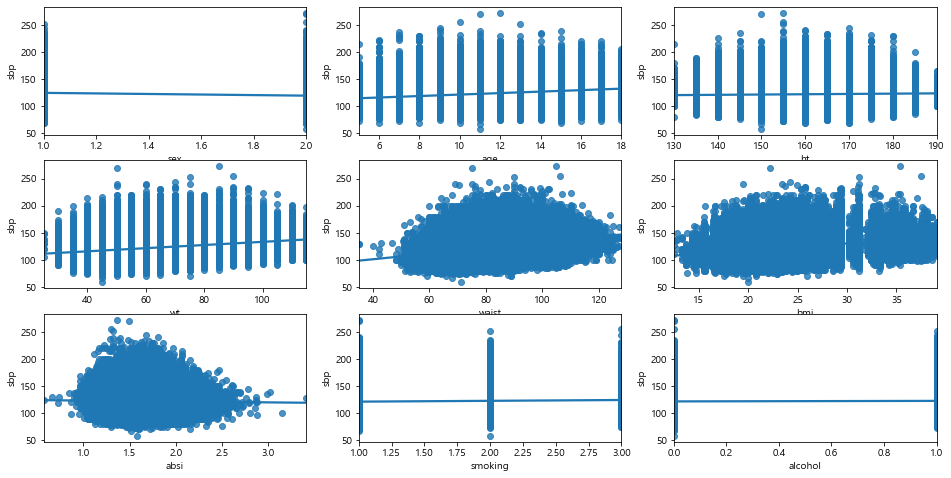

In [18]:
%%time

fig, axs = plt.subplots(figsize = (16,8), ncols = 3, nrows = 3 )
lm_features = ['sex','age','ht','wt','waist','bmi','absi','smoking','alcohol']

for i, feature in enumerate(lm_features):
    row = int(i/3)
    col = i%3
    
    sns.regplot(x = feature, y = 'sbp', data = df, ax = axs[row][col])